# K Nearest Neighbors Theory

A classification algorithm operating on the principle of a datapoint being classified
based on its proximity to "neighbouring" points.

Training Algorithm:
1. Store all the data

Prediction Algorithm:
1. Calculate the distance from x to all points in the data
2. Sort the point in the data by increasing distance from x
3. Predict the majority label of the k-nearest neighbours (closest points)

Generally, choosing a different k will affect what class new points will be assigned to.
A greater k will often lead to a more "smooth" and "biased" model --> a cleaner separation of
the model. It must also be considered, though, that this reduction in the noise is at the cost
of more potential errors.


Pros:
- Simple
- Trivial training
- Works with great number of classes
- Adding more data is easy
- Few algorithm parameters: k and "distance" metric
  - the distance metric --> mathematical definition of the distance between the datapoints

Cons:
- Costly --> algorithm gets worse for larger data sets and the prediction costs rise
- Not optimal for high dimensional data sets (features/dimensions increase --> distance measuring for the dimesnions
is disrupted)
- Not optimal for categorical features


## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv("baseball.csv")

In [3]:
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,?,?,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4,5,162,0.306,0.37799999999999995
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5,4,162,0.315,0.40299999999999997
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,?,?,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,?,?,162,0.335,0.424


## Standardize the Variables
Impute the data.
Replace League with int and drop unneeded columns.
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [4]:
from sklearn.impute import SimpleImputer

imputerQ1 = SimpleImputer(missing_values='?', strategy='constant', fill_value=0.3)
imputerQ1 = imputerQ1.fit(df[['OOBP', 'OSLG']])
df[['OOBP', 'OSLG']] = imputerQ1.transform(df[['OOBP', 'OSLG']])

imputerQ2 = SimpleImputer(missing_values='?', strategy='constant', fill_value=6)
imputerQ2 = imputerQ2.fit(df[['RankSeason']])
df[['RankSeason']] = imputerQ2.transform(df[['RankSeason']])
df.League.replace(['NL', 'AL'], [1, 0], inplace=True)

#Drop useless columns - of no interest
df.drop(['RankPlayoffs', 'Team'], axis=1, inplace=True)

In [5]:
df = pd.get_dummies(df)
display(df)


,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,...,OSLG_0.47100000000000003,OSLG_0.473,OSLG_0.474,OSLG_0.475,OSLG_0.47600000000000003,OSLG_0.48,OSLG_0.48100000000000004,OSLG_0.483,OSLG_0.494,OSLG_0.499
0,1,2012,734,688,81,0.328,0.418,0.259,0,162,...,0,0,0,0,0,0,0,0,0,0
1,1,2012,700,600,94,0.320,0.389,0.247,1,162,...,0,0,0,0,0,0,0,0,0,0
2,0,2012,712,705,93,0.311,0.417,0.247,1,162,...,0,0,0,0,0,0,0,0,0,0
3,0,2012,734,806,69,0.315,0.415,0.260,0,162,...,0,0,0,0,0,0,0,0,0,0
4,1,2012,613,759,61,0.302,0.378,0.240,0,162,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,1,1962,705,759,81,0.330,0.390,0.260,0,161,...,0,0,0,0,0,0,0,0,0,0
1228,1,1962,706,626,93,0.321,0.394,0.268,0,161,...,0,0,0,0,0,0,0,0,0,0
1229,1,1962,878,690,103,0.341,0.441,0.278,1,165,...,0,0,0,0,0,0,0,0,0,0
1230,1,1962,774,664,84,0.335,0.394,0.271,0,163,...,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)

x_train = train.drop('W', axis=1)
y_train = train['W']

x_test = test.drop('W', axis=1)
y_test = test['W']

In [7]:
#Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)


In [8]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt


## Predictions and Evaluations
Let's evaluate our KNN model!

In [9]:
rmse_val = [] # to store rmse values for different k
for k in range(50):
    k = k + 1
    model = neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print("RMSE for k={}: {}".format(k, error))
    print("R^2 for k={}: {}\n".format(k, model.score(x_test, y_test)))

RMSE for k=1: 7.45998333452236
R^2 for k=1: 0.5718877846747844

RMSE for k=2: 6.395152302562698
R^2 for k=2: 0.6853819110118501

RMSE for k=3: 6.096717967068018
R^2 for k=3: 0.7140605250185146

RMSE for k=4: 5.85587023560258
R^2 for k=4: 0.7362060725563351

RMSE for k=5: 5.802292184524544
R^2 for k=5: 0.7410111337036231

RMSE for k=6: 5.755960482932547
R^2 for k=6: 0.745130708000381

RMSE for k=7: 5.731614651086495
R^2 for k=7: 0.7472821759864997

RMSE for k=8: 5.600008295119339
R^2 for k=8: 0.7587544862697808

RMSE for k=9: 5.537050260947513
R^2 for k=9: 0.7641483946737225

RMSE for k=10: 5.503780027816754
R^2 for k=10: 0.7669741820688004

RMSE for k=11: 5.458029190525468
R^2 for k=11: 0.7708321906651543

RMSE for k=12: 5.422842979100168
R^2 for k=12: 0.7737774132444568

RMSE for k=13: 5.451079264946227
R^2 for k=13: 0.7714154360604617

RMSE for k=14: 5.431688548267781
R^2 for k=14: 0.7730387971403079

RMSE for k=15: 5.446484388318046
R^2 for k=15: 0.7718006350815417

RMSE for k=16: 5

## Plotting the RMSE values against k values

Text(0, 0.5, 'RMSE')

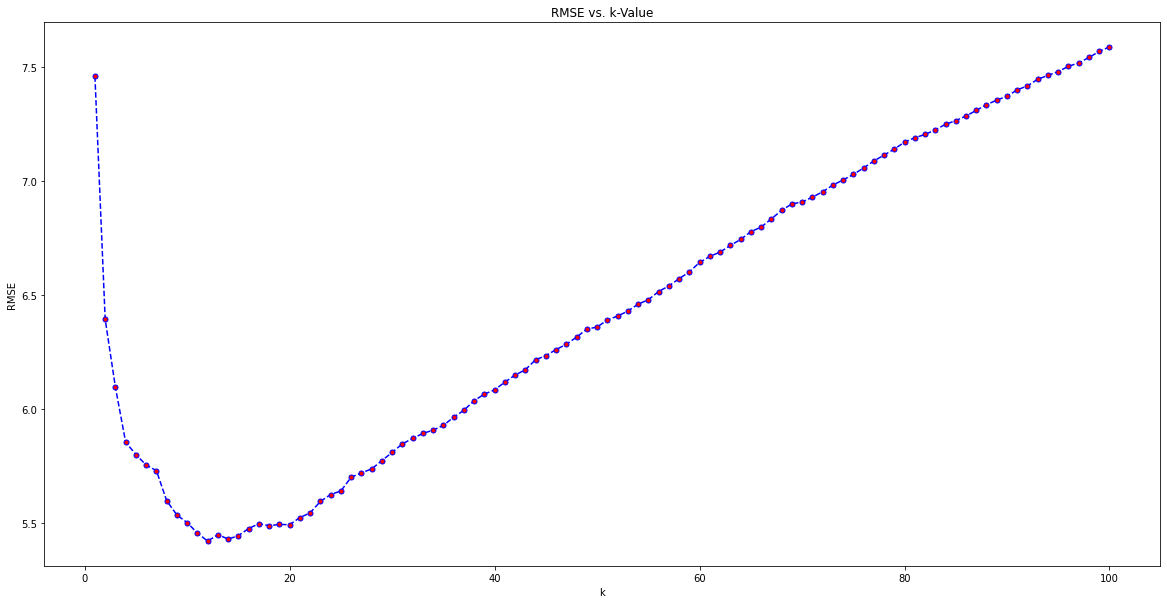

In [10]:
plt.figure(figsize=(20,10))
plt.plot(range(1,51), rmse_val, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=5)
plt.title('RMSE vs. k-Value')
plt.xlabel('k')
plt.ylabel('RMSE')

## Implementing GridsearchCV

In order to optimize finding the best k-Value, gridsearch could be implemented

In [11]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': range(1, 51)}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train, y_train)
print("Best k-Value is: ", model.best_params_['n_neighbors'])

Best k-Value is:  10


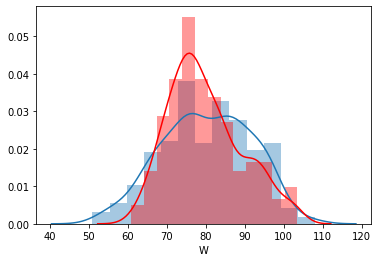

In [15]:
model_12 = neighbors.KNeighborsRegressor(n_neighbors=12)
model_12.fit(x_train, y_train)
pred_cv = model.predict(x_test)
sns.distplot(y_test)
sns.distplot(pred_cv, color='red')


